# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

### Exercises
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions in this notebook below and submit to your Github account.

1. Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
3. Is the true population mean really 98.6 degrees F?
4. Would you use a one-sample or two-sample test? Why?
5. In this situation, is it appropriate to use the  t  or  z  statistic?
6. Now try using the other test. How is the result be different? Why?
7. At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.
9. Is there a significant difference between males and females in normal temperature?
What test did you use and why?

Write a story with your conclusion in the context of the original problem.  

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

First, check the loaded data frame to get some idea on the dataset.
From the results below, we know that the dataset has 130 observations and 3 variables. No missing data found. And it appears that the data format of all variables are correct. 

In [2]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [4]:
df.shape

(130, 3)

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1) Is the distribution of body temperatures normal?
Through distribution plot (histogram and kernel density estimation), it seems although there are two "peaks" shown in the historgram, the KDE curve and QQ plot look quite close to normal distribution.

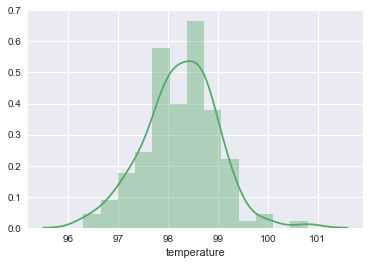

In [32]:
# Plot the body temperature variable.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.distplot(df['temperature'], kde=True, color='g')
plt.show()

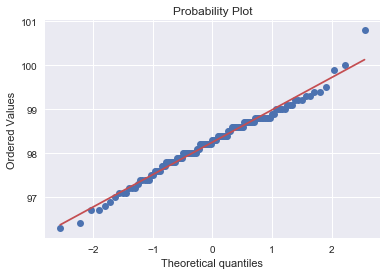

In [37]:
# Check QQ Plot
import numpy as np 
import pylab
import scipy.stats as stats
 
stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()

### 2) Is the sample size large? Are the observations independent?
In order to fulfill the assumption for CLT, sample size should be large enough. We saw in 1) that the dataset has 130 observations, which is large enough to apply central limited theorem.
The observations were collected from 120 people, which is assumed to be independet from each other. Therefore, temperature observations are assumed to be independent in this case.

### 3) Is the true population mean really 98.6 $^{\circ}\mathrm{F}$?
We need to apply one-sample t-test to answer this question. Because the mean temperature is compared to a fixed value (98.6 $^{\circ}\mathrm{F}$), and the variance of human body temperature is unknown, a t-test will be more appropriate here.
The results showed that the testing p-value is less than 0.01, therefore the mean is significantly different from 98.6 degrees F.

In [42]:
t_stat, p = stats.ttest_1samp(df['temperature'], 98.6)
print("t-statistic = %6.3f p-value = %6.4f" % (t_stat, p))

t-statistic = -5.455 p-value = 0.0000


### 4) In this situation, is it appropriate to use the  t  or  z  statistic?
The most appropriate statistical test should be one sample t-test because of the unknown true variance. If we try to use z-test, the p-value is less than 0.01 as well, and we will draw the same conclusion as 3).
The t-statistic and z-statistic are (about) the same because we have 130 samples, which will result in the t-distribution very close to normal distribution of the same mean and variance.



In [48]:
z_stat = (df['temperature'].mean() - 98.6) / np.sqrt(stats.describe(df['temperature']).variance / float(len(df['temperature'])))
p_z = stats.norm.sf(np.abs(z_stat))*2
print("z-statistic = %6.3f p-value = %6.4f" % (z_stat, p_z))

z-statistic = -5.455 p-value = 0.0000


### 5) At what temperature should we consider someone's temperature to be "abnormal"?
If we see someone's temperature falls outside the 95% confidence interval, we consider that this person's temperature is abnormal.
The 95% confidence interval indicates that if someone's temperature is lower than 98.1 $^{\circ}\mathrm{F}$ or higher than 98.4 $^{\circ}\mathrm{F}$, the temperature is considered to be abnormal.

In [57]:
MOE = 1.96*np.sqrt(stats.describe(df['temperature']).variance / float(len(df['temperature'])))
cl_min = df['temperature'].mean() - MOE
cl_max = df['temperature'].mean() + MOE
print("95%% confidence interval: %6.1f, %6.1f" % (cl_min, cl_max))

95% confidence interval:   98.1,   98.4


### 6) Is there a significant difference between males and females in normal temperature?
Because the temperature were measured independently, in order to compare two samples mean temperature we should use independent two-sample t-test.
The test results showed that male and female mean body temperatures are significantly different because the p-value is 0.0239 < 0.05.

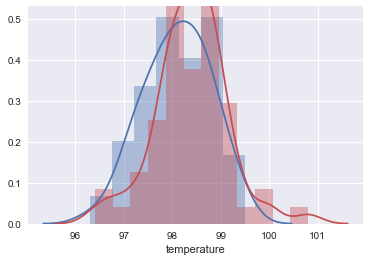

In [35]:
# Check temperature by gender
sns.set()
sns.distplot(df.loc[df['gender'] == 'M','temperature'], kde=True, color='b')
sns.distplot(df.loc[df['gender'] == 'F','temperature'], kde=True, color='r')
plt.show()

In [58]:
# Independent two-sample t-test
t_stat_2sample, p_2sample = stats.ttest_ind(df.loc[df['gender'] == 'M','temperature'], df.loc[df['gender'] == 'F','temperature'])
print("t-statistic = %6.3f p-value = %6.4f" % (t_stat_2sample, p_2sample))

t-statistic = -2.285 p-value = 0.0239


### Conclusions
From the above analysis we can conclude that:
1) The mean temperature of the observed population is significantly different from the claimed 98.6 $^{\circ}\rm{F}$;
2) If someone's temperature is lower than 98.1 $^{\circ}\mathrm{F}$ or higher than 98.4 $^{\circ}\mathrm{F}$, the temperature is considered to be abnormal;
3) Male and female average body temperatures are significantly different.